# Предобработка финального проекта

- Автор: Евгений Мазуров
- Дата: 21.10.2025

### Цели и задачи проекта

**Цель проекта**: помочь команде маркетплейса создать дашборд, с помощью которого можно будет быстро оценивать и контролировать динамику продаж, активности пользователей и качество товаров для принятия оперативных бизнес-решений

**Задачи**:
1. Проверить качество данных и провести их предварительную предобработку: удалить дубликаты, обработать пропуски, преобразовать типы данных, категоризировать признаки, найти и исправить логические ошибки (отрицательные цены, невозможные значения)
2. Изучить распределения признаков
3. Найти аномалии и выбросы
4. Выполнить корреляционный анализ
5. Сделать визуализации визуализацию с помощью гистограмм, линейных графиков по времени
6. Выгрузить данные

## Описание данных

1. Данные **/final_data/categories.csv** содержат информацию о категориях, которым принадлежат продукты:
    
   **category_id** - уникальный ID категории;
    
   **name** - название продукта;
    
   **parent_category_id** -  ID родительской категории для иерархической структуры.

    
2. Данные **/final_data/order_items.csv** содержат информацию о товарах, которые были фактически проданы в конкретных заказах:
    
   **order_item_id** - уникальный ID позиции заказа;
    
   **order_id** - ID заказа (внешний ключ на таблицу **orders**);
    
   **product_id** -  ID товара (внешний ключ на таблицу **products**);
    
   **quantity** - количество единиц товара в позиции;
    
   **price_at_order_time** - цена товара на момент оформления заказа.
   
     
3. Данные **/final_data/orders.csv** содержат информацию о заказах:
    
   **order_id** - уникальный ID заказа;
    
   **buyer_id** - ID покупателя (внешний ключ на таблицу **users**);
                                  
   **order_date** - дата создания заказа;
    
   **status** - статус заказа;
    
   **total_amount** - общая сумма заказа.
    
4. Данные **/final_data/products.csv** содержат информацию о всех товарах маркетплейса, которые могут быть выставлены продавцами:
    
   **product_id** - уникальный ID товара;
    
   **title** - название товара;
    
   **description** - описание товара;
    
   **category_id** - категория товара (внешний ключ на таблицу **categories**);
    
   **price** - цена товара;
    
   **stock_quantity** -  количество товара в наличии;
    
   **seller_id** -  ID продавца.
    
5. Данные **/final_data/reviews.csv** содержат информацию об отзывах пользователей:
    
   **review_id** - уникальный ID отзыва;
    
   **user_id** -  ID пользователя (внешний ключ на таблицу **users**);
    
   **product_id** -  ID товара (внешний ключ на таблицу **products**);
    
   **rating** - оценка товара;
    
   **comment** - текст отзыва;
    
   **review_date** - дата создания отзыва.
    
6. Данные **/final_data/transactions.csv** содержат информацию о платежах и возвратах пользователей:
    
   **transaction_id** - уникальный ID транзакции;
    
   **user_id** - ID пользователя (внешний ключ на таблицу **users**);
    
   **amount** - сумма платежа, может быть отрицательной в случае возврата;
    
   **transaction_type** - тип транзакции (refund или payment);
    
   **transaction_date** - дата платежа или возврата.
    
7. Данные **/final_data/users.csv** содержат информацию обо всех пользователях маркетплейса:
    
   **user_id** -  уникальный ID пользователя;
    
   **name** - имя пользователя;
    
   **email** - электронный адрес;
    
   **phone** - телефон;
    
   **user_type** - тип пользователя (*buyer* или *seller*);
    
   **registration_date** - дата регистрации;
    
   **is_active** - активность пользователя (*true* или *false*).

### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Подготовка данных
- Удаление дубликатов
- В таблицах orders, reviews, transactions, users преобразуем столбцы с датами в тип datetime.
- В таблице products найти строки с отрицательными значениями цен (price < 0). Заменить их на 0.
- В таблице reviews добавить новый столбец rating_category, в котором: High, если рейтинг ≥ 4.5; Medium, если от 4 до 4.49; Low, если меньше 4.
- Проверка наличия пропусков в данных
3. Исследовательская часть 
- Изучение распределения признаков
- Выделение аномалий и выбросов
- Корреляционный анализ
4. Фильтрация данных по дате с 1 января по 1 июня 2025 года, проверка и выгрузка данных.
5. Выводы

## 1. Загрузка данных и знакомство с ними

- Загружаем необходимые библиотеки Python и данные датасетов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузим таблицу из CSV-файлов с использованием функции
def load_table(file_path):
    print(f"Загружаем таблицу {file_path}...")
    df = pd.read_csv(file_path)
    print(f"Таблица {file_path} загружена, размер: {df.shape}")
    return df

In [3]:
#Список ключевых таблиц с соответствующими путями
tables = {'orders': r'C:\Users\evgen\Downloads\final_data\orders.csv', 'order_items': r'C:\Users\evgen\Downloads\final_data\order_items.csv', 'products': r'C:\Users\evgen\Downloads\final_data\products.csv', 'users': r'C:\Users\evgen\Downloads\final_data\users.csv', 'categories': r'C:\Users\evgen\Downloads\final_data\categories.csv', 'transactions': r'C:\Users\evgen\Downloads\final_data\transactions.csv', 'reviews': r'C:\Users\evgen\Downloads\final_data\reviews.csv'}

In [4]:
#Загружаем все таблицы в словарь
data = {}
for tbl, file_path in tables.items():
    data[tbl] = load_table(file_path)

Загружаем таблицу C:\Users\evgen\Downloads\final_data\orders.csv...
Таблица C:\Users\evgen\Downloads\final_data\orders.csv загружена, размер: (505400, 5)
Загружаем таблицу C:\Users\evgen\Downloads\final_data\order_items.csv...
Таблица C:\Users\evgen\Downloads\final_data\order_items.csv загружена, размер: (1516751, 5)
Загружаем таблицу C:\Users\evgen\Downloads\final_data\products.csv...
Таблица C:\Users\evgen\Downloads\final_data\products.csv загружена, размер: (52100, 7)
Загружаем таблицу C:\Users\evgen\Downloads\final_data\users.csv...
Таблица C:\Users\evgen\Downloads\final_data\users.csv загружена, размер: (111300, 7)
Загружаем таблицу C:\Users\evgen\Downloads\final_data\categories.csv...
Таблица C:\Users\evgen\Downloads\final_data\categories.csv загружена, размер: (1800, 3)
Загружаем таблицу C:\Users\evgen\Downloads\final_data\transactions.csv...
Таблица C:\Users\evgen\Downloads\final_data\transactions.csv загружена, размер: (811200, 5)
Загружаем таблицу C:\Users\evgen\Downloads\fin

## 2. Предобработка данных

In [5]:
#Удаление дубликатов
total_dups = 0
for name, df in data.items():
    dups = df.duplicated().sum()
    total_dups += dups
    print(f'{name}: {dups} дубликатов')
    if dups > 0:
        df.drop_duplicates(inplace = True)
if total_dups == 0:
    print(f'Отличные новости: во всех таблицах дупликаты не найдены!')

orders: 0 дубликатов
order_items: 0 дубликатов
products: 0 дубликатов
users: 0 дубликатов
categories: 0 дубликатов
transactions: 0 дубликатов
reviews: 0 дубликатов
Отличные новости: во всех таблицах дупликаты не найдены!


In [6]:
#Преобразуем даты
data['orders']['order_date'] = pd.to_datetime(data['orders']['order_date'])
data['reviews']['review_date'] = pd.to_datetime(data['reviews']['review_date'])
data['transactions']['transaction_date'] = pd.to_datetime(data['transactions']['transaction_date'])
data['users']['registration_date'] = pd.to_datetime(data['users']['registration_date'])

In [7]:
#Исправим отрицательные цены в products
neg_prices = data['products'][data['products']['price'] < 0].shape[0]
if neg_prices > 0:
    data['products'].loc[data['products']['price'] < 0, 'price'] = 0
print(f'products: исправлено {neg_prices} отрицательных цен')

products: исправлено 0 отрицательных цен


In [8]:
# Проверим пропуски
for name, df in data.items():
    print(f"\n{name} - пропущенные значения:")
    print(df.isna().sum())


orders - пропущенные значения:
order_id        0
buyer_id        0
order_date      0
status          0
total_amount    0
dtype: int64

order_items - пропущенные значения:
order_item_id          0
order_id               0
product_id             0
quantity               0
price_at_order_time    0
dtype: int64

products - пропущенные значения:
product_id         0
title             63
description        0
category_id        0
price              0
stock_quantity     0
seller_id          0
dtype: int64

users - пропущенные значения:
user_id              0
name                 0
email                0
phone                0
user_type            0
registration_date    0
is_active            0
dtype: int64

categories - пропущенные значения:
category_id             0
name                    2
parent_category_id    885
dtype: int64

transactions - пропущенные значения:
transaction_id      0
user_id             0
amount              0
transaction_type    0
transaction_date    0
dtype: int64

re

In [9]:
#Категоризация рейтинга в reviews
def categorize_rating(r):
    if r >= 4.5:
        return 'High'
    if r >= 4:
        return 'Medium'
    else:
        return 'Low'
data['reviews']['rating_category'] = data['reviews']['rating'].apply(categorize_rating)
print('reviews: добавлен столбец rating_category')

reviews: добавлен столбец rating_category


## 3. Исследовательский анализ

In [12]:
def eda(df, columns):
    print(f"\nСтатистика по признакам: {columns}")
    display(df[columns].describe())

    for col in columns:
        fig, axs = plt.subplots(1,2, figsize=(12, 4))
    
        sns.histplot(df[col].dropna(), kde=True, ax=axs[0])
        axs[0].set_title(f"Гистограмма {col}")
    
        sns.boxplot(x=df[col], ax=axs[1])
        axs[1].set_title(f"Боксплот {col}")
    
        plt.show()


Статистика по признакам: ['price', 'stock_quantity']


,price,stock_quantity
count,52100.000000,52100.000000
mean,506.569939,500.620461
std,285.605499,287.761399
min,10.020000,0.000000
25%,260.072500,254.000000
50%,507.810000,502.000000
75%,754.180000,747.000000
max,999.990000,1000.000000


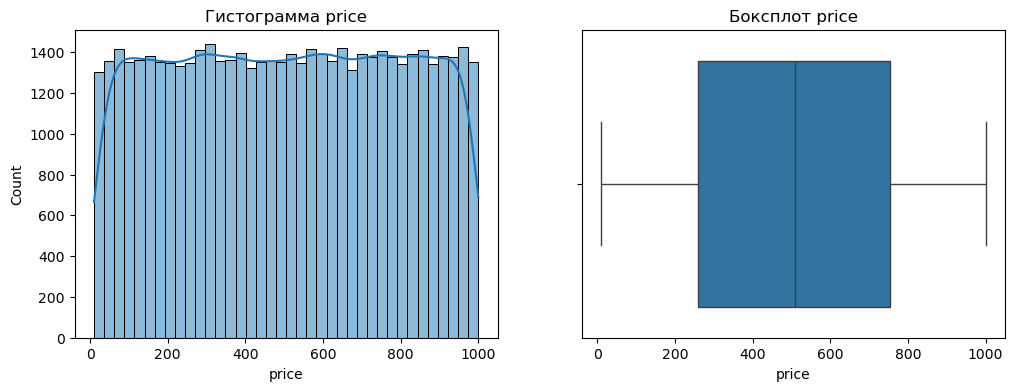

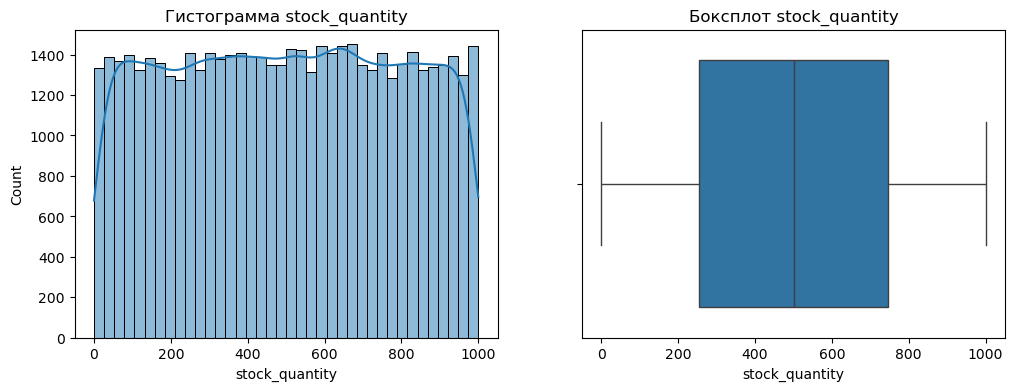

In [14]:
#Пример для products
eda(data['products'], ['price','stock_quantity'])

In [15]:
#Корреляция
corr = data['products'][['price', 'stock_quantity']].corr()
print("\nКорреляционная матрица:")
display(corr)


Корреляционная матрица:


,price,stock_quantity
price,1.000000,0.000815
stock_quantity,0.000815,1.000000


## 4. Выгрузка и обработка данных

In [16]:
import os

In [17]:
output_dir = 'exported.csv'
os.makedirs(output_dir, exist_ok=True)

In [18]:
#Фильтрация данных по дате с 1 января по 1 июня 2026 года
orders_filtered = data['orders'][
    (data['orders']['order_date'] >= '2025-01-01')&
    (data['orders']['order_date'] <= '2025-06-01')
]

In [19]:
#Выгрузка
orders_path = os.path.join(output_dir, 'orders_filtered.csv')
orders_filtered.to_csv(orders_path, sep=";", index=False)

print(f"Таблица заказов успешно выгружена: {orders_path}")
print(f"Строк: {orders_filtered.shape[0]}, Колонок: {orders_filtered.shape[1]}")

Таблица заказов успешно выгружена: exported.csv\orders_filtered.csv
Строк: 246456, Колонок: 5


## 5. Выводы

Проверка, исследовательский анализ и обработка данных проведены успешно. Данные можно использовать для создания дашборда.